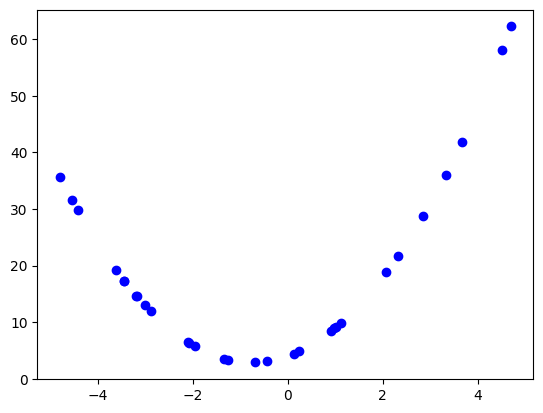

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Simulating a second-order polynomial with random input values
np.random.seed(42) # For reproducibility
X = np.random.uniform(-5, 5, 30)
y = 2 * X**2 + 3 * X + 4
X = X.reshape(-1, 1)

# Plotting the data
plt.scatter(X,y, color='blue')

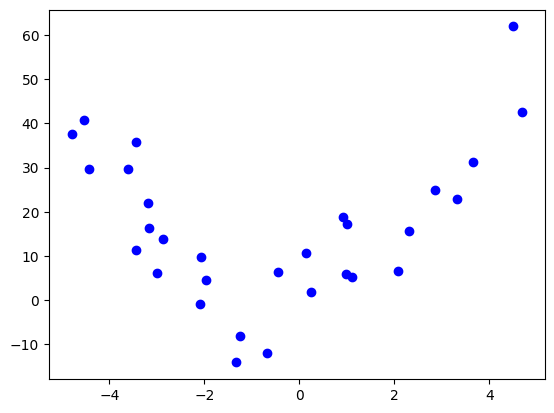

In [2]:
# Simulating a second-order polynomial with random input values and noise component
np.random.seed(42) # For reproducibility
X = np.random.uniform(-5, 5, 30)
y = 2 * X**2 + 3 * X + 4 + np.random.normal(0, 10, X.shape[0])
X = X.reshape(-1, 1)

# Plotting the data
plt.scatter(X,y, color='blue')

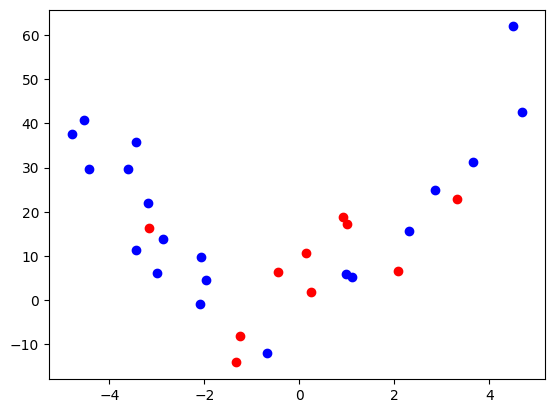

In [3]:
from sklearn.model_selection import train_test_split

# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10, random_state=42)

# Plotting the data
plt.scatter(X_train, y_train, color='blue')
plt.scatter(X_test, y_test, color='red')

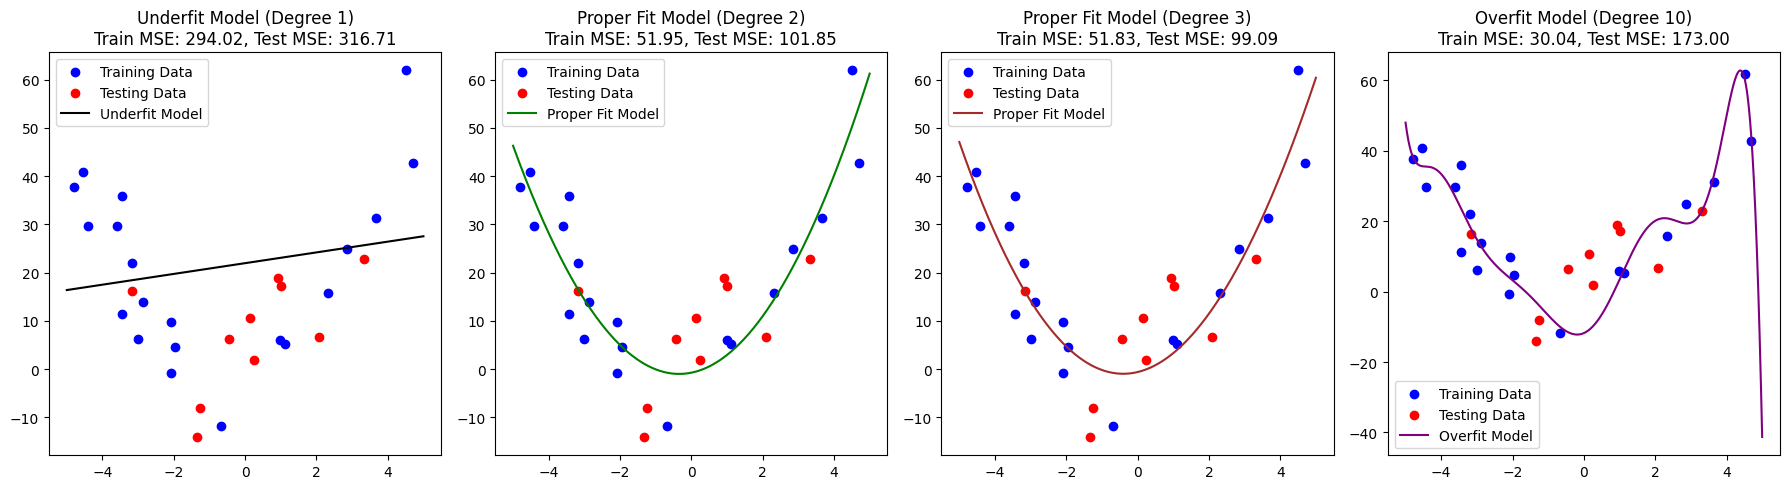

In [4]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Generating smooth data for plotting
X_plot = np.linspace(-5, 5, 1000).reshape(-1, 1)

# Function to train and evaluate models
def train_model(degree, X_train, y_train, X_test, y_test):
    poly = PolynomialFeatures(degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    model = LinearRegression().fit(X_train_poly, y_train)

    # Training and testing errors
    y_train_pred = model.predict(X_train_poly)
    train_error = mean_squared_error(y_train, y_train_pred)
    y_test_pred = model.predict(X_test_poly)
    test_error = mean_squared_error(y_test, y_test_pred)

    # Predicting smooth curve for plotting
    X_plot_poly = poly.transform(X_plot)
    y_plot = model.predict(X_plot_poly)

    return train_error, test_error, y_plot

# Training models
degrees = [1, 2, 3, 10]
results = {}
for degree in degrees:
    train_error, test_error, y_plot = train_model(degree, X_train, y_train, X_test, y_test)
    results[degree] = (train_error, test_error, y_plot)

# Plotting results
plt.figure(figsize=(18, 5))

# Underfit (degree 1)
plt.subplot(1, 4, 1)
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.scatter(X_test, y_test, color='red', label='Testing Data')
plt.plot(X_plot, results[1][2], color='black', label='Underfit Model')
plt.title(f'Underfit Model (Degree 1)\nTrain MSE: {results[1][0]:.2f}, Test MSE: {results[1][1]:.2f}')
plt.legend()

# Proper Fit (degree 2)
plt.subplot(1, 4, 2)
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.scatter(X_test, y_test, color='red', label='Testing Data')
plt.plot(X_plot, results[2][2], color='green', label='Proper Fit Model')
plt.title(f'Proper Fit Model (Degree 2)\nTrain MSE: {results[2][0]:.2f}, Test MSE: {results[2][1]:.2f}')
plt.legend()

# Proper Fit (degree 3)
plt.subplot(1, 4, 3)
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.scatter(X_test, y_test, color='red', label='Testing Data')
plt.plot(X_plot, results[3][2], color='brown', label='Proper Fit Model')
plt.title(f'Proper Fit Model (Degree 3)\nTrain MSE: {results[3][0]:.2f}, Test MSE: {results[3][1]:.2f}')
plt.legend()

# Overfit (degree 10)
plt.subplot(1, 4, 4)
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.scatter(X_test, y_test, color='red', label='Testing Data')
plt.plot(X_plot, results[10][2], color='purple', label='Overfit Model')
plt.title(f'Overfit Model (Degree 10)\nTrain MSE: {results[10][0]:.2f}, Test MSE: {results[10][1]:.2f}')
plt.legend()

plt.tight_layout()
plt.show()

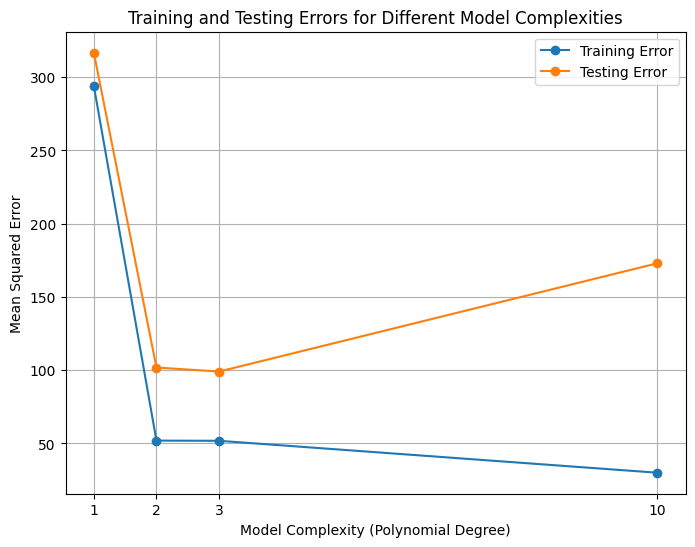

In [5]:
# Calculating training and testing errors for all models
train_errors = [results[degree][0] for degree in degrees]
test_errors = [results[degree][1] for degree in degrees]

# Plotting the training and testing errors
plt.figure(figsize=(8, 6))
plt.plot(degrees, train_errors, marker='o', label='Training Error')
plt.plot(degrees, test_errors, marker='o', label='Testing Error')
plt.xlabel('Model Complexity (Polynomial Degree)')
plt.ylabel('Mean Squared Error')
plt.title('Training and Testing Errors for Different Model Complexities')
plt.xticks(degrees)  # Ensure all degrees are shown on x-axis
plt.legend()
plt.grid(True)
plt.show()

In [6]:
# Function to train and evaluate models, and demonstrate the bias-variance decomposition
def train_model_decomposition(degree, X_train, y_train, X_test, y_test):
    poly = PolynomialFeatures(degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    model = LinearRegression().fit(X_train_poly, y_train)

    # Training and testing errors
    y_train_pred = model.predict(X_train_poly)
    train_error = np.mean((y_train_pred - np.mean(y_train))**2)
    train_bias = (np.mean(y_train_pred) - np.mean(y_train))**2
    train_variance = np.mean((y_train_pred - np.mean(y_train_pred))**2)
    y_test_pred = model.predict(X_test_poly)
    test_error = np.mean((y_test_pred - np.mean(y_test))**2)
    test_bias = (np.mean(y_test_pred) - np.mean(y_test))**2
    test_variance = np.mean((y_test_pred - np.mean(y_test_pred))**2)

    # Predicting smooth curve for plotting
    X_plot_poly = poly.transform(X_plot)
    y_plot = model.predict(X_plot_poly)

    return train_error, train_bias, train_variance, test_error, test_bias, test_variance, y_plot

# Training models
degrees_decomposition = [1, 2, 3, 10]
results_decomposition = {}
for degree in degrees_decomposition:
    train_error, train_bias, train_variance, test_error, test_bias, test_variance, y_plot = train_model_decomposition(degree, X_train, y_train, X_test, y_test)
    results_decomposition[degree] = (train_error, train_bias, train_variance, test_error, test_bias, test_variance, y_plot)

In [7]:
import pandas as pd

# Creating a dataframe for the testing error decomposition
df_test = pd.DataFrame({
    "Model_Order": [1, 2, 3, 10],
    "Test Error": [results_decomposition[1][3], results_decomposition[2][3], results_decomposition[3][3], results_decomposition[10][3]],
    "Test Bias": [results_decomposition[1][4], results_decomposition[2][4], results_decomposition[3][4], results_decomposition[10][4]],
    "Test Variance": [results_decomposition[1][5], results_decomposition[2][5], results_decomposition[3][5], results_decomposition[10][5]]
})

In [8]:
# Calculating the irreducible testing error
df_test['Irreducible Error'] = df_test['Test Error'] - df_test['Test Bias'] - df_test['Test Variance']
df_test

,Model_Order,Test Error,Test Bias,Test Variance,Irreducible Error
0,1,208.011406,204.198291,3.813115,8.082424e-14
1,2,86.682469,2.599904,84.082565,0.000000e+00
2,3,87.226212,2.188081,85.038131,-1.421085e-14
3,10,185.236581,25.772121,159.464460,-5.684342e-14


In [9]:
# Creating a dataframe for the training error decomposition
df_train = pd.DataFrame({
    "Model_Order": [1, 2, 3, 10],
    "Train Error": [results_decomposition[1][0], results_decomposition[2][0], results_decomposition[3][0], results_decomposition[10][0]],
    "Train Bias": [results_decomposition[1][1], results_decomposition[2][1], results_decomposition[3][1], results_decomposition[10][1]],
    "Train Variance": [results_decomposition[1][2], results_decomposition[2][2], results_decomposition[3][2], results_decomposition[10][2]]
})

In [10]:
# Calculating the irreducible training error
df_train['Irreducible Error'] = df_train['Train Error'] - df_train['Train Bias'] - df_train['Train Variance']
df_train

,Model_Order,Train Error,Train Bias,Train Variance,Irreducible Error
0,1,11.917322,0.000000e+00,11.917322,0.000000e+00
1,2,253.982056,5.048710e-29,253.982056,2.842171e-14
2,3,254.102311,1.262177e-29,254.102311,0.000000e+00
3,10,275.890468,1.022364e-27,275.890468,5.684342e-14
